In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [2]:
train=pd.read_csv("uber_nyc_enriched.csv")
train.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,1/1/15 1:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,1/1/15 1:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,1/1/15 1:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,1/1/15 1:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,1/1/15 1:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [3]:
total=train.isnull().sum().sort_values(ascending=False)
percent=(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
pd.concat([total,percent],keys=['Total','Percent'],axis=1)

,Total,Percent
borough,3043,0.104567
hday,0,0.000000
sd,0,0.000000
pcp24,0,0.000000
pcp06,0,0.000000
pcp01,0,0.000000
slp,0,0.000000
dewp,0,0.000000
temp,0,0.000000
vsb,0,0.000000


In [4]:
print(train.shape)
# train=train[train.borough.notnull()]
# print(train.shape)

(29101, 13)


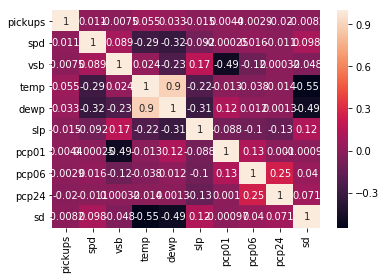

In [5]:
import seaborn as sns
cr=train.corr()
sns.heatmap(cr,annot=True)
plt.show()

In [6]:
train.replace('Y',1,inplace=True)
train.replace('N',0,inplace=True)

In [7]:
train.replace("Bronx",1,inplace=True)
train.replace("Brooklyn",2,inplace=True)
train.replace("EWR",3,inplace=True)
train.replace("Manhattan",4,inplace=True)
train.replace("Queens",5,inplace=True)
train.replace("Staten Island",6,inplace=True)
train.fillna(0,inplace=True)

In [8]:
train.groupby(['borough']).count()

,pickup_dt,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
borough,,,,,,,,,,,,
0.0,3043,3043,3043,3043,3043,3043,3043,3043,3043,3043,3043,3043
1.0,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343
2.0,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343
3.0,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343
4.0,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343
5.0,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343
6.0,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343,4343


In [9]:
train.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,1/1/15 1:00,1.0,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1
1,1/1/15 1:00,2.0,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1
2,1/1/15 1:00,3.0,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1
3,1/1/15 1:00,4.0,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1
4,1/1/15 1:00,5.0,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1


In [10]:
import re
def dtform(a):
    date=[]
    time=[]
    for i in a:
        t=i.split()
        date.append(t[0])
        time.append(re.sub(':','',t[1]))
    date=pd.DataFrame(date)
    time=pd.DataFrame(time)
    dt_pickup=pd.concat([date,time],axis=1)
    dt_pickup.columns=['date','time']
    return dt_pickup

In [11]:
dt_time=dtform(train.pickup_dt)
dt_time.time=dt_time.time.astype(float)
dt_time.loc[:,['time']]/=10000
print(dt_time.shape)
train.drop('pickup_dt',inplace=True,axis=1)
print(train.shape)
train=pd.concat([dt_time,train],axis=1,ignore_index=True)
train.columns=['date','time','borough','pickups','spd','vsb','temp','dewp','slp','pcp01','pcp06','pcp24','sd','hday']
train.head()
train3=train

(29101, 2)
(29101, 12)


In [12]:
total=train.isnull().sum().sort_values(ascending=False)
percent=(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
pd.concat([total,percent],keys=['Total','Percent'],axis=1)

,Total,Percent
hday,0,0.0
sd,0,0.0
pcp24,0,0.0
pcp06,0,0.0
pcp01,0,0.0
slp,0,0.0
dewp,0,0.0
temp,0,0.0
vsb,0,0.0
spd,0,0.0


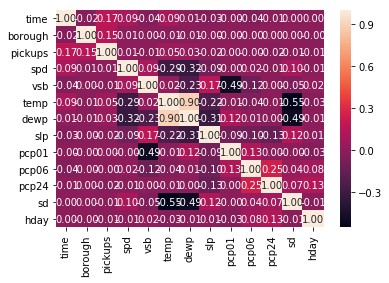

In [13]:
cr=train.corr()
sns.heatmap(cr,cbar=True,annot=True,fmt='.2f',annot_kws={'size':10})
plt.show()

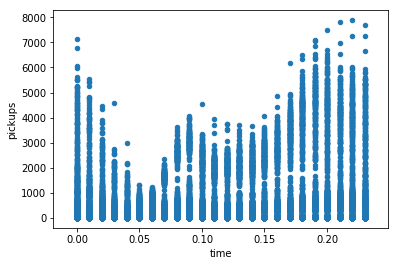

In [14]:
df=pd.concat([train.time,train.pickups],axis=1)
df.plot.scatter(x='time',y='pickups')
plt.show()

In [15]:
# train['pickups']=np.cbrt(train['pickups'])
# df=pd.concat([train.time,train.pickups],axis=1)
# df.plot.scatter(x='time',y='pickups')

In [16]:
train.describe()

,time,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
count,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000
mean,0.115976,3.134016,490.215903,5.984924,8.818125,47.669042,30.823065,1017.817938,0.003830,0.026129,0.090464,2.529169,0.038521
std,0.069070,1.938765,995.649536,3.699007,2.442897,19.814969,21.283444,7.768796,0.018933,0.093125,0.219402,4.520325,0.192454
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-16.000000,991.400000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.060000,1.000000,1.000000,3.000000,9.100000,32.000000,14.000000,1012.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.120000,3.000000,54.000000,6.000000,10.000000,46.000000,30.000000,1018.200000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.180000,5.000000,449.000000,8.000000,10.000000,64.500000,50.000000,1022.900000,0.000000,0.000000,0.050000,2.958333,0.000000
max,0.230000,6.000000,7883.000000,21.000000,10.000000,89.000000,73.000000,1043.400000,0.280000,1.240000,2.100000,19.000000,1.000000


In [17]:
trgt=train.loc[:,'pickups']
# x=train.loc[:,['borough','time','hday']]
x=train.drop('pickups',axis=1)
x=x.drop(['date'],axis=1)

In [18]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error as mse
x_train,x_val,y_train,y_val=train_test_split(x,trgt,test_size=0.3,random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression,Lasso
lr=LinearRegression(normalize=True)
lrr=lr.fit(x_train,y_train)
y_pred=lrr.predict(x_val)
print("rsquare Score",lrr.score(x_val,y_val))
print("rmse: ",np.sqrt(mse(y_val,y_pred)))

rsquare Score 0.05474808161237288
rmse:  997.2680174716287


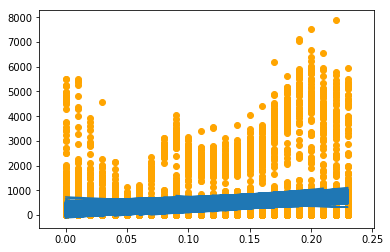

In [20]:
plt.scatter(x_val['time'],y_val,color='#FFA500')
plt.plot(x_val['time'],y_pred)
plt.show()

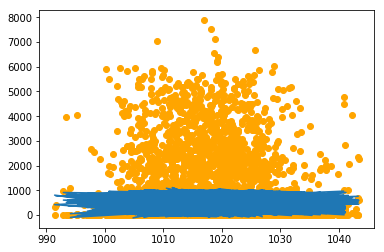

In [21]:
plt.scatter(x_val['slp'],y_val,color='#FFA500')
plt.plot(x_val['slp'],y_pred)
plt.show()

In [22]:
ls=Lasso()
lsr=ls.fit(x_train,y_train)
y_pred=lsr.predict(x_val)
print("rsquare Score",lsr.score(x_val,y_val))
print("rmse: ",np.sqrt(mse(y_val,y_pred)))

rsquare Score 0.054784819189650946
rmse:  997.2486376818961


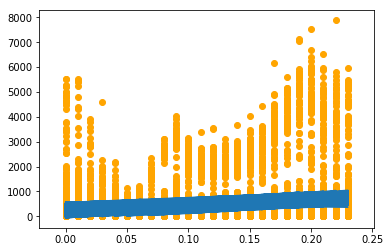

In [23]:
plt.scatter(x_val['time'],y_val,color='#FFA500')
plt.plot(x_val['time'],y_pred)
plt.show()

In [24]:
from sklearn.ensemble import RandomForestRegressor
clf_rf=RandomForestRegressor(random_state=42)
cr=clf_rf.fit(x_train,y_train)
y_pred=cr.predict(x_val)
print("rsquare Score",cr.score(x_val,y_val))
print("rmse: ",np.sqrt(mse(y_val,y_pred)))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


rsquare Score 0.9100833288210883
rmse:  307.5800887236839


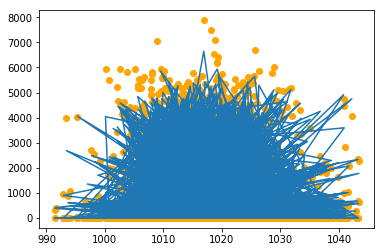

In [25]:
plt.scatter(x_val['slp'],y_val,color='#FFA500')
plt.plot(x_val['slp'],y_pred)
plt.show()

In [26]:
train.groupby(['hday']).describe()

borough                                                  dewp  \
        count      mean       std  min  25%  50%  75%  max    count   
hday                                                                  
0     27980.0  3.134239  1.938655  0.0  1.0  3.0  5.0  6.0  27980.0   
1      1121.0  3.128457  1.942362  0.0  1.0  3.0  5.0  6.0   1121.0   

                 ...   time            vsb                                  \
           mean  ...    75%   max    count      mean       std   min   25%   
hday             ...                                                         
0     30.857505  ...   0.18  0.23  27980.0  8.807175  2.462304  0.00   9.1   
1     29.963440  ...   0.18  0.23   1121.0  9.091432  1.875426  2.06  10.0   

                        
       50%   75%   max  
hday                    
0     10.0  10.0  10.0  
1     10.0  10.0  10.0  

[2 rows x 96 columns]

In [27]:
t1=train[train['hday']==1]
t2=train[train['hday']==0]
t1.reset_index(drop=True,inplace=True)
t2.reset_index(drop=True,inplace=True)
print(t1.shape)
print(t2.shape)

(1121, 14)
(27980, 14)


In [28]:
t22=t2.loc[:1120,:]
print(t22.shape)

(1121, 14)


In [29]:
train2=pd.concat([t1,t22],axis=0,ignore_index=True)
print(train2.shape)
train2.reset_index(drop=True,inplace=True)
train2.head()

(2242, 14)


,date,time,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,1/1/15,0.01,1.0,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1
1,1/1/15,0.01,2.0,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1
2,1/1/15,0.01,3.0,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1
3,1/1/15,0.01,4.0,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1
4,1/1/15,0.01,5.0,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1


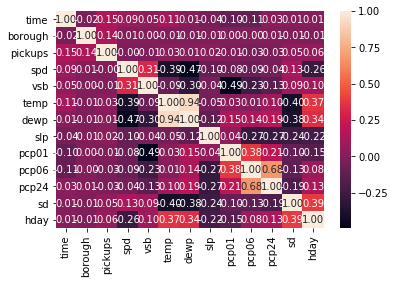

In [30]:
cr=train2.corr()
sns.heatmap(cr,cbar=True,annot=True,fmt='.2f',annot_kws={'size':10})
plt.show()

In [31]:
trgt2=train2.loc[:,'pickups']
# x2=train2.loc[:,['borough','hday']]
x2=train2.drop(['pickups','date'],axis=1)

In [32]:
x_train,x_val,y_train,y_val=train_test_split(x2,trgt2,test_size=0.3,random_state=42)

In [33]:
# t21=t2.loc[1121:,:]
# print(t21.shape)

In [34]:
# t21trgt=t21.loc[:,'pickups']
# x21=t21.drop(['pickups','date'],axis=1)

In [35]:
# print(y_val.shape)
# x21=x21.loc[:,['borough','time','hday']]
# x_val=pd.concat([x_val,x21],axis=0,ignore_index=True)
# y_val=pd.concat([y_val,t21trgt],axis=0,ignore_index=True)
# print(x_val.shape)
# print(y_val.shape)

In [36]:
lr=LinearRegression(normalize=True)
lrr=lr.fit(x_train,y_train)
y_pred=lrr.predict(x_val)
print("rsquare Score",lrr.score(x_val,y_val))
# print("rsquare Score with nonholidays",lrr.score(x21,t21trgt))
print("rmse: ",np.sqrt(mse(y_val,y_pred)))

rsquare Score 0.03848443888220221
rmse:  815.5636652059053


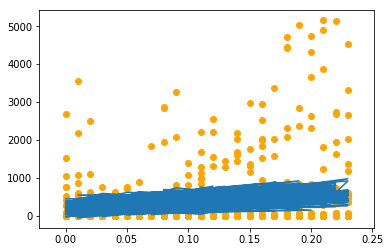

In [37]:
plt.scatter(x_val['time'],y_val,color='#FFA500')
plt.plot(x_val['time'],y_pred)
plt.show()

In [38]:
clf_rf=RandomForestRegressor(random_state=42)
cr=clf_rf.fit(x_train,y_train)
y_pred=cr.predict(x_val)
print("rsquare Score",cr.score(x_val,y_val))
# print("rsquare Score with nonholidays",cr.score(x21,t21trgt))
print("rmse: ",np.sqrt(mse(y_val,y_pred)))

rsquare Score 0.8785785487784258
rmse:  289.81937793673745


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


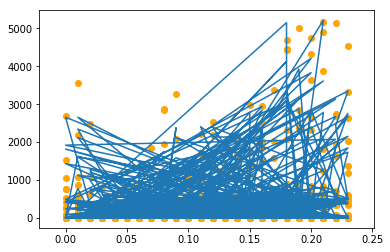

In [39]:
plt.scatter(x_val['time'],y_val,color='#FFA500')
plt.plot(x_val['time'],y_pred)
plt.show()

In [40]:
train3.head()

,date,time,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,1/1/15,0.01,1.0,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1
1,1/1/15,0.01,2.0,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1
2,1/1/15,0.01,3.0,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1
3,1/1/15,0.01,4.0,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1
4,1/1/15,0.01,5.0,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1


In [41]:
train3.borough.replace(1,"Bronx",inplace=True)
train3.borough.replace(2,"Brooklyn",inplace=True)
train3.borough.replace(3,"EWR",inplace=True)
train3.borough.replace(4,"Manhattan",inplace=True)
train3.borough.replace(5,"Queens",inplace=True)
train3.borough.replace(6,"Staten Island",inplace=True)
train3.borough.replace(0,"others",inplace=True)
train3.hday.replace(1,'Yes',inplace=True)
train3.hday.replace(0,'No',inplace=True)
train3.head()

,date,time,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,1/1/15,0.01,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Yes
1,1/1/15,0.01,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Yes
2,1/1/15,0.01,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Yes
3,1/1/15,0.01,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Yes
4,1/1/15,0.01,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Yes


In [42]:
train3=pd.get_dummies(train3,columns=['borough','hday'])

In [43]:
train3.head()

,date,time,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,...,sd,borough_Bronx,borough_Brooklyn,borough_EWR,borough_Manhattan,borough_Queens,borough_Staten Island,borough_others,hday_No,hday_Yes
0,1/1/15,0.01,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,...,0.0,1,0,0,0,0,0,0,0,1
1,1/1/15,0.01,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,...,0.0,0,1,0,0,0,0,0,0,1
2,1/1/15,0.01,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,...,0.0,0,0,1,0,0,0,0,0,1
3,1/1/15,0.01,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,...,0.0,0,0,0,1,0,0,0,0,1
4,1/1/15,0.01,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,...,0.0,0,0,0,0,1,0,0,0,1


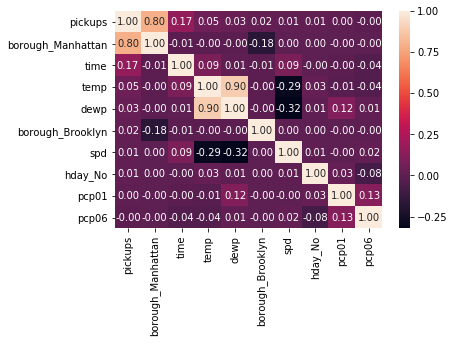

In [44]:
col=train3.corr().nlargest(10,'pickups').index
cr=np.corrcoef(train3[col].values.T)
sns.heatmap(cr,cbar=True,annot=True,fmt='.2f',annot_kws={'size':10},yticklabels=col.values,xticklabels=col.values)
plt.show()

In [45]:
trgt=train3.loc[:,'pickups']
x=train3.drop(['pickups','date'],axis=1)

In [46]:
x_train,x_val,y_train,y_val=train_test_split(x,trgt,test_size=0.3,random_state=42)

In [47]:
lr=LinearRegression(normalize=True)
lrr=lr.fit(x_train,y_train)
y_pred=lrr.predict(x_val)
print("rsquare Score",lrr.score(x_val,y_val))
print("rmse: ",np.sqrt(mse(y_val,y_pred)))

rsquare Score 0.6975377535693904
rmse:  564.1228539273254


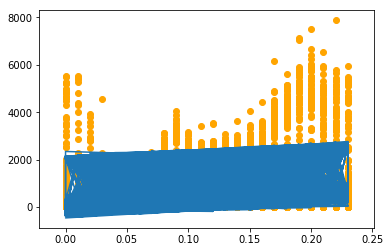

In [48]:
plt.scatter(x_val['time'],y_val,color='#FFA500')
plt.plot(x_val['time'],y_pred)
plt.show()

In [49]:
ls=Lasso()
lsr=ls.fit(x_train,y_train)
y_pred=lsr.predict(x_val)
print("rsquare Score",lsr.score(x_val,y_val))
print("rmse: ",np.sqrt(mse(y_val,y_pred)))

rsquare Score 0.697165072951213
rmse:  564.4702905659306


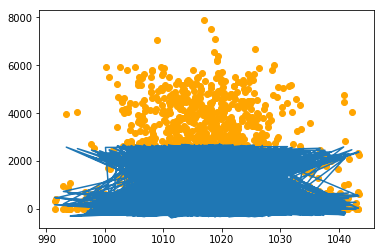

In [50]:
plt.scatter(x_val['slp'],y_val,color='#FFA500')
plt.plot(x_val['slp'],y_pred)
plt.show()

In [51]:
clf_rf=RandomForestRegressor(random_state=42)
cr=clf_rf.fit(x_train,y_train)
y_pred=cr.predict(x_val)
print("rsquare Score",cr.score(x_val,y_val))
print("rmse: ",np.sqrt(mse(y_val,y_pred)))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


rsquare Score 0.9098870904437051
rmse:  307.91554442968885


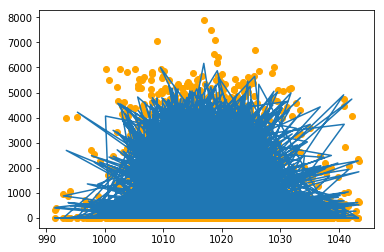

In [52]:
plt.scatter(x_val['slp'],y_val,color='#FFA500')
plt.plot(x_val['slp'],y_pred)
plt.show()

In [53]:
train3.describe()

,time,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,borough_Bronx,borough_Brooklyn,borough_EWR,borough_Manhattan,borough_Queens,borough_Staten Island,borough_others,hday_No,hday_Yes
count,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000
mean,0.115976,490.215903,5.984924,8.818125,47.669042,30.823065,1017.817938,0.003830,0.026129,0.090464,2.529169,0.149239,0.149239,0.149239,0.149239,0.149239,0.149239,0.104567,0.961479,0.038521
std,0.069070,995.649536,3.699007,2.442897,19.814969,21.283444,7.768796,0.018933,0.093125,0.219402,4.520325,0.356330,0.356330,0.356330,0.356330,0.356330,0.356330,0.306000,0.192454,0.192454
min,0.000000,0.000000,0.000000,0.000000,2.000000,-16.000000,991.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.060000,1.000000,3.000000,9.100000,32.000000,14.000000,1012.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.120000,54.000000,6.000000,10.000000,46.000000,30.000000,1018.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.180000,449.000000,8.000000,10.000000,64.500000,50.000000,1022.900000,0.000000,0.000000,0.050000,2.958333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,0.230000,7883.000000,21.000000,10.000000,89.000000,73.000000,1043.400000,0.280000,1.240000,2.100000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
train3.to_csv('clean_uber_.csv', index=False)